# Data Acquisition

In [1]:
import os
import shutil

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display

# !sudo apt-get install p7zip-full

## Definition of Control Variables

In [2]:
GDRIVE_DATA_DIR = "23-24_CE903-SU_team06/dataset/"
GDRIVE_MODEL_DIR = "23-24_CE903-SU_team06/saved_models/"

## Mount Google Drive

In [3]:
from google.colab import drive
contentPath = "/content/"
if not os.path.exists(contentPath + 'drive'):
  drive.mount( contentPath + 'drive')

Mounted at /content/drive


### Read Dataset and Get Frames

In [4]:
csv_files = [f"/content/drive/My Drive/{GDRIVE_DATA_DIR}audio_data_300_before_framing_16Khz.feather"]

In [5]:
df_from_save = pd.read_feather(csv_files[0])
df_from_save['key'] = df_from_save['index']
df_from_save.drop(columns=['index'], inplace=True)
df_from_save.set_index('key', inplace=True)
df_from_save.head(3)

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
key,,,,,,,,
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...","[6.2792744e-12, 1.3262988e-11, 2.1134771e-11, ...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
b9408db9-881b-4a95-ba6c-ac51602955a6,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...","[5.454812e-10, -7.5795303e-10, -2.2023776e-09,...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e9bf0a5a-ff96-480b-a54a-f647143e1d6f,"[6.08183e-09, 3.8103284e-08, 4.4398583e-08, 3....","[-7.584575e-09, -2.4847802e-09, 3.0562568e-08,...",16000,22050,[158400],[218295],"[[2.777657, 3.235886]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Get Frames
- Variable: all_frames_from_save

In [6]:
%load_ext autoreload
%autoreload 2

In [ ]:
GDRIVE_COMPONENT_DIR = f"/content/drive/My Drive/23-24_CE903-SU_team06/cough_segmentation/utils/"
print(os.listdir(GDRIVE_COMPONENT_DIR))

import sys
sys.path.append(GDRIVE_COMPONENT_DIR)

from framing import Framing
frame = Framing()

['__init__.py', 'framing.py', 'simple_ingestion.py', 'utils.py', '__pycache__', '.ipynb_checkpoints', 'sono_cross_val_zcr.py', 'train_with_zcr.py', 'feature_extraction_melspectogram.py', 'feature_extraction.py', 'sono_cross_val.py']


Frame size 1024, hop_length 512, count 82957
Hop Length: 512


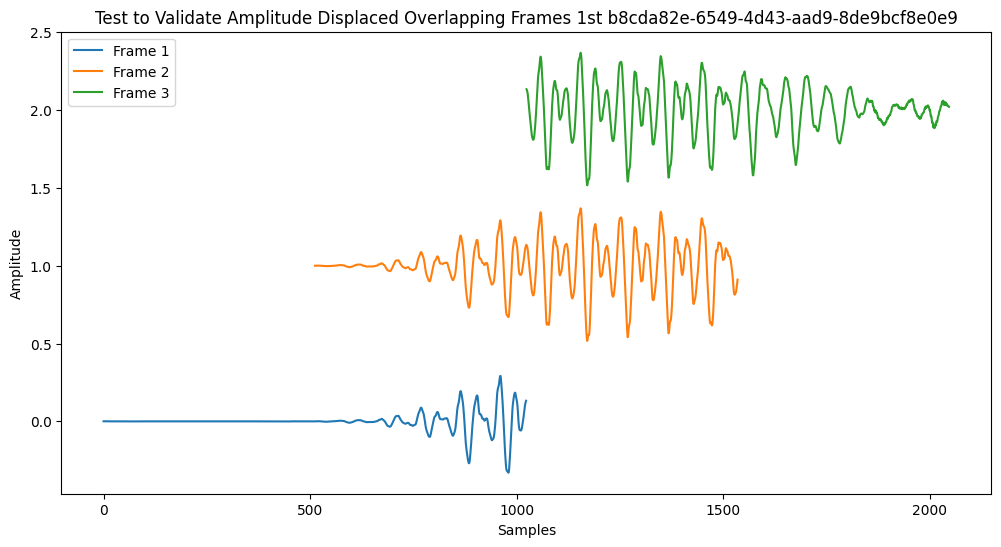

Hop Length: 512


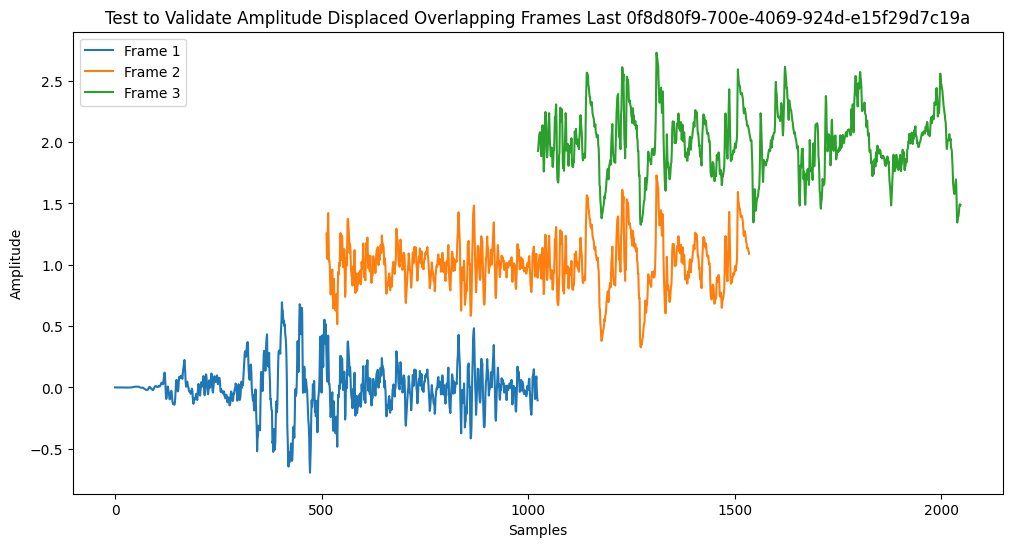

In [ ]:
all_frames_from_save = frame.apply_framing(audio_df=df_from_save, frame_sizes=[1024])
df_frame_from_save = all_frames_from_save[1024]
df_frame_from_save.head(3)

visual_set = {"1st":df_frame_from_save.head(1)["key"].values[0],"Last":df_frame_from_save.tail(1)["key"].values[0]}
frame.visualize_overlapping_frames(title='Test to Validate Amplitude Displaced Overlapping Frames', framed_df=df_frame_from_save, visual_set=visual_set)

# Feature Extraction

## Mel Spectogram

In [ ]:
from feature_extraction_melspectogram import MelSpectogram
mel_spectogram = MelSpectogram()
#help(mel_spectogram)

In [ ]:
mel_spec_df = mel_spectogram.compute_mel_spectrograms(df_frame_from_save)
mel_spec_df

,mel,mel_shape,key,sf,start,end,max_amp,frame_index,amp,label
0,"[[-49.471313, -45.68248, -42.952454, -41.20059...","(64, 16)",b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,1024,0.006137,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0
1,"[[-49.61094, -48.172184, -47.08938, -44.50936,...","(64, 16)",b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,1536,0.023188,1,"[-0.00024980583, -0.00026363018, -0.0002713691...",0
2,"[[-38.306217, -38.219006, -38.82951, -39.85528...","(64, 16)",b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1024,2048,0.074459,2,"[-0.0018562947, -0.0023917924, -0.0028657983, ...",0
3,"[[-26.36286, -26.713167, -27.691568, -29.2802,...","(64, 16)",b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1536,2560,0.074459,3,"[0.0014159846, -0.0015856944, -0.0045660823, -...",0
4,"[[-20.302574, -20.074223, -20.54555, -21.73757...","(64, 16)",b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,2048,3072,0.079874,4,"[0.031991042, 0.025611315, 0.019131511, 0.0129...",0
...,...,...,...,...,...,...,...,...,...,...
82952,"[[-8.932718, -8.852959, -9.472567, -10.779726,...","(64, 16)",0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,59904,60928,0.021871,117,"[-0.021708837, -0.022235444, -0.021958912, -0....",0
82953,"[[-6.2855225, -5.407734, -5.258396, -5.8152733...","(64, 16)",0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60416,61440,0.001310,118,"[0.00046911323, 0.0005246451, 0.00047831138, 0...",0
82954,"[[-17.538776, -12.770256, -8.975155, -6.158115...","(64, 16)",0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60928,61952,0.000399,119,"[4.2529864e-05, 2.6461403e-05, 3.3375203e-05, ...",0
82955,"[[-0.4936943, 0.0, -0.1877861, -1.0560646, -2....","(64, 16)",0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,61440,62464,0.000332,120,"[0.0003304775, 0.0003139911, 0.00031356188, 0....",0


# Model Training

In [ ]:
mel_spec_df.shape

(82957, 10)

In [ ]:
!pip install imbalanced-learn

## Split Data into Train and Test Set

In [ ]:
no_cough_class = df_from_save['cough_start_end'].isna()
no_cough_class

key
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9     True
b9408db9-881b-4a95-ba6c-ac51602955a6     True
e9bf0a5a-ff96-480b-a54a-f647143e1d6f    False
e4729edf-12e5-4ba9-883e-1114c32b90f0    False
4c2840ed-fd4b-4a86-b976-5cc040d6ea4e    False
                                        ...  
48b287c0-5c2b-44ef-b469-3808b3b287ea    False
52f6838a-4033-4a71-84bb-81cbb4e64ab7    False
7a8bd218-252f-4d84-a035-0d3262efa825     True
9d539eb5-62de-4d5d-994b-866238ecd96e     True
0f8d80f9-700e-4069-924d-e15f29d7c19a    False
Name: cough_start_end, Length: 300, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.2
# Perform train-test split
X_train_nocough, X_test_nocough = train_test_split(df_from_save[no_cough_class==True].index, test_size=test_size, random_state=42)

X_train_cough, X_test_cough = train_test_split(df_from_save[no_cough_class==False].index, test_size=test_size, random_state=42)

# Display the results
print("X_train_nocough:", X_train_nocough.shape)
print("X_test_nocough:", X_test_nocough.shape)
print("X_train_cough:", X_train_cough.shape)
print("X_test_cough:", X_test_cough.shape)


X_train_nocough: (120,)
X_test_nocough: (30,)
X_train_cough: (120,)
X_test_cough: (30,)


In [ ]:
# merge train set (cough + nocough)
len(list(X_train_cough) + list(X_train_nocough))

240

## Cross val with 80% train set

Sono Cross Val Split
 StratifiedKFold(n_splits=5, random_state=6, shuffle=True) 	Total Audio Files: 300


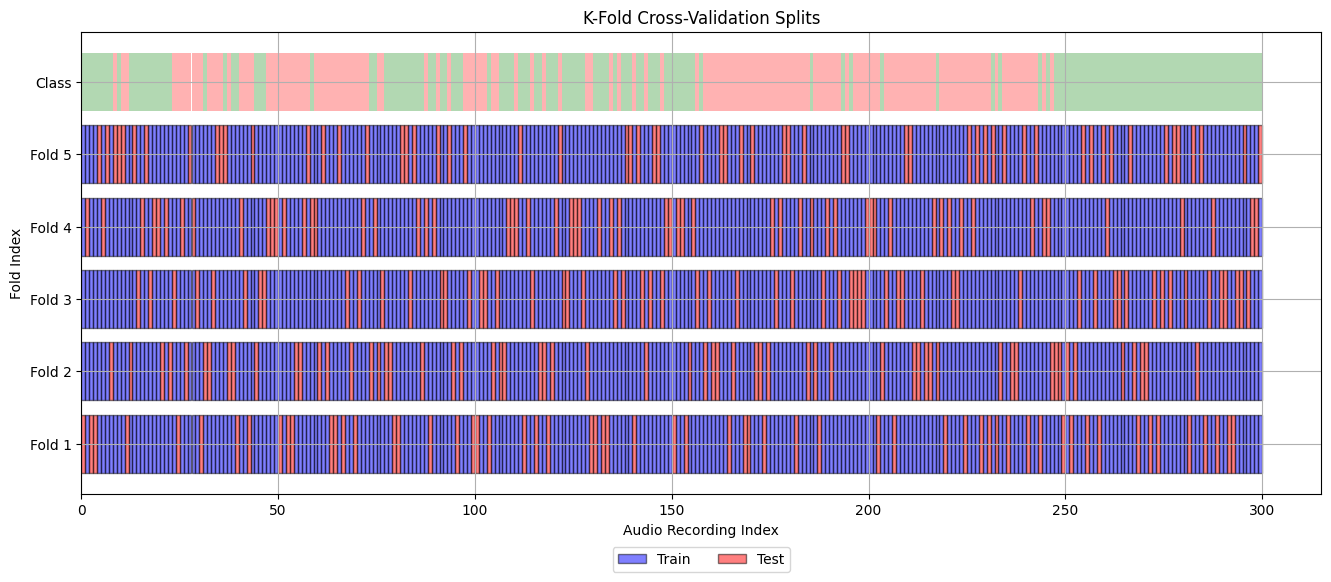

In [ ]:
from sono_cross_val import CrossValSplit
# cv_strat = CrossValSplit(df_single_frame=df_1024_spectogram[ df_1024_spectogram['key'].isin( list(X_train_cough) + list(X_train_nocough) ) ], non_cough_keys=X_train_nocough)
# adaptation due to of time limitation
cv_strat = CrossValSplit(df_single_frame=mel_spec_df, non_cough_keys=df_from_save[no_cough_class==True].index)

cv_strat_data = cv_strat.cross_val(stratified=True, shuffle=True, plot=True, show_fold_info=False)

In [ ]:
mel_spec_df.loc[cv_strat_data[1][0]]

,mel,mel_shape,key,sf,start,end,max_amp,frame_index,amp,label
64,"[[-28.458115, -27.34364, -26.9939, -27.365776,...","(64, 16)",b9408db9-881b-4a95-ba6c-ac51602955a6,16000,0,1024,0.020692,0,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...",0
65,"[[-38.617996, -39.059853, -40.144188, -41.8252...","(64, 16)",b9408db9-881b-4a95-ba6c-ac51602955a6,16000,512,1536,0.024697,1,"[-0.008925999, -0.0088388845, -0.008110482, -0...",0
66,"[[-30.257095, -30.642384, -31.826355, -33.9195...","(64, 16)",b9408db9-881b-4a95-ba6c-ac51602955a6,16000,1024,2048,0.037222,2,"[0.002205449, 0.004359279, 0.0070404857, -0.00...",0
67,"[[-37.213215, -37.673565, -38.900482, -40.9344...","(64, 16)",b9408db9-881b-4a95-ba6c-ac51602955a6,16000,1536,2560,0.058464,3,"[0.00276856, 0.0051492443, 0.0020777467, 0.006...",0
68,"[[-27.538414, -27.975956, -29.20242, -31.33257...","(64, 16)",b9408db9-881b-4a95-ba6c-ac51602955a6,16000,2048,3072,0.058464,4,"[0.03539607, 0.008230816, 0.030858662, 0.03123...",0
...,...,...,...,...,...,...,...,...,...,...
82234,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","(64, 16)",52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,155136,156160,0.000000,303,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
82235,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","(64, 16)",52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,155648,156672,0.000000,304,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
82236,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","(64, 16)",52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,156160,157184,0.000000,305,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
82237,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","(64, 16)",52f6838a-4033-4a71-84bb-81cbb4e64ab7,16000,156672,157696,0.000000,306,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [ ]:
drop_out = 50
#drop_out = 25
#drop_out = 0

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf


#14-Jun-24: no longer necessary at this point, moved after cross val has been completed
# Bring in mel-spectrogram from dataframe created above, put it in expected size
#mel_spectrograms = np.array([mel_spec.reshape(64, 16, 1) for mel_spec in audio_df_with_mel_spectrograms['mel']])
#mel_spectrograms = spectrograms

# Bring in labels (cough (1) vs non-cough (0))
# labels = np.array(df_1024_spectogram['label'])

# Define the model architecture
def cough_detection_model(input_shape):
    """
    Creates a CNN model for cough detection.

    Args:
        input_shape: A tuple representing the shape of the input data (e.g., (64, 16, 1)).

    Returns:
        A compiled Keras model.
    """

    # Input layer
    inputs = keras.Input(shape=input_shape)

    # First convolutional layer
    x = layers.Conv2D(16, kernel_size=(9, 3), activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 1))(x)

    # Second convolutional layer
    x = layers.Conv2D(16, kernel_size=(5, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 1))(x)

    # Flatten the output of convolutional layers
    x = layers.Flatten()(x)

    # First fully-connected layer with dropout
    x = layers.Dense(256, activation="relu")(x)
    if drop_out > 0:
      #x = layers.Dropout(0.5)(x)  # Dropout with probability 0.5
      x = layers.Dropout(drop_out/100)(x)  # Dropout with probability 0.5

    # Second fully-connected layer with dropout
    x = layers.Dense(256, activation="relu")(x)
    if drop_out > 0:
      #x = layers.Dropout(0.5)(x)  # Dropout with probability 0.5
      x = layers.Dropout(drop_out/100)(x)  # Dropout with probability 0.5


    # Output layer with softmax activation
    outputs = layers.Dense(1, activation="sigmoid")(x)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    #loss="binary_crossentropy"
    #loss=custom_loss
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
        metrics=[
                "accuracy",
                metrics.Precision(name='precision'),
                metrics.Recall(name='recall'),
                metrics.AUC(name='auc_roc', curve='ROC'),
                metrics.AUC(name='auc_pr', curve='PR'),
                metrics.TruePositives(name='true_positives'),
                metrics.FalsePositives(name='false_positives'),
                metrics.TrueNegatives(name='true_negatives'),
                metrics.FalseNegatives(name='false_negatives'),
                metrics.FBetaScore(name='f1_score', beta=1.0)
    ])

    return model

def custom_loss(y_true, y_pred):
    false_positives = tf.reduce_sum((1 - y_true) * y_pred)
    false_negatives = tf.reduce_sum(y_true * (1 - y_pred))

    # Assign higher weight to false positives
    weight_fp = 1.2  # Adjust this weight as needed
    weight_fn = 1.1

    # Binary cross-entropy loss
    bce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)

    # Combined loss
    combined_loss = bce_loss + (weight_fp * false_positives) + (weight_fn * false_negatives)
    return combined_loss

# 14-Jun-24: Not being used
# Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
# class_weights = dict(enumerate(class_weights))
# print("Class weights:", class_weights)


In [ ]:
batch_size = 1024
epochs = 10
per_proba = 50

Start Epoch (Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82947, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82956],
      dtype='int64', length=63315), Index([   64,    65,    66,    67,    68,    69,    70,    71,    72,    73,
       ...
       81005, 81006, 81007, 81008, 81009, 81010, 81011, 81012, 81013, 81014],
      dtype='int64', length=19642))
Epoch 1/10
111/111 [==============================] - 17s 29ms/step - loss: 0.6906 - accuracy: 0.7661 - precision: 0.7507 - recall: 0.7967 - auc_roc: 0.8239 - auc_pr: 0.7880 - true_positives: 45002.0000 - false_positives: 14943.0000 - true_negatives: 41540.0000 - false_negatives: 11481.0000 - f1_score: 0.6666 - val_loss: 0.4030 - val_accuracy: 0.8042 - val_precision: 0.3134 - val_recall: 0.8077 - val_auc_roc: 0.8855 - val_auc_pr: 0.4639 - val_true_positives: 1583.0000 - val_false_positives: 3468.0000 - val_true_negatives: 14214.0000 - val_false_negatives: 377.0000 - val_f1_sco

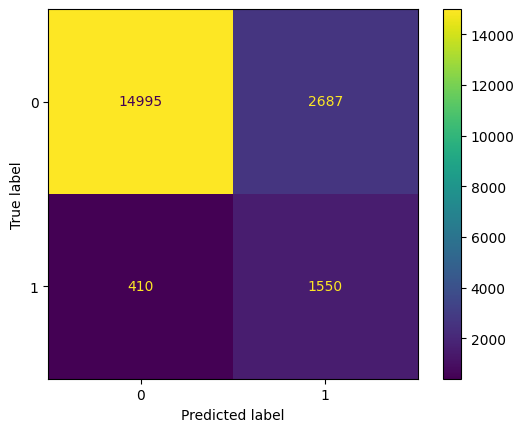

Start Epoch (Index([   64,    65,    66,    67,    68,    69,    70,    71,    72,    73,
       ...
       82229, 82230, 82231, 82232, 82233, 82234, 82235, 82236, 82237, 82238],
      dtype='int64', length=68044), Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82947, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82956],
      dtype='int64', length=14913))
Epoch 1/10
120/120 [==============================] - 6s 28ms/step - loss: 0.4804 - accuracy: 0.7885 - precision: 0.7728 - recall: 0.8172 - auc_roc: 0.8620 - auc_pr: 0.8377 - true_positives: 49900.0000 - false_positives: 14667.0000 - true_negatives: 46392.0000 - false_negatives: 11159.0000 - f1_score: 0.6667 - val_loss: 0.3291 - val_accuracy: 0.8531 - val_precision: 0.4304 - val_recall: 0.6558 - val_auc_roc: 0.8728 - val_auc_pr: 0.4661 - val_true_positives: 1185.0000 - val_false_positives: 1568.0000 - val_true_negatives: 11538.0000 - val_false_negatives: 622.0000 - val_f1_scor

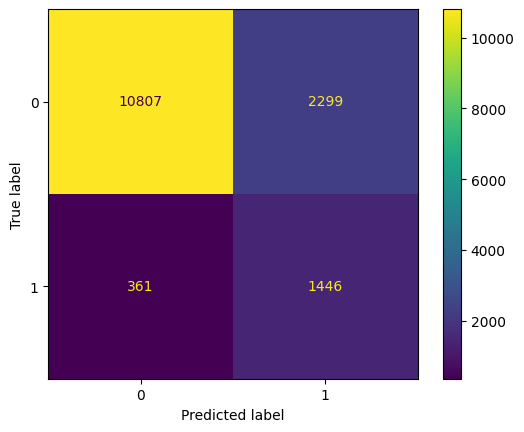

Start Epoch (Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82947, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82956],
      dtype='int64', length=69040), Index([  687,   688,   689,   690,   691,   692,   693,   694,   695,   696,
       ...
       81619, 81620, 81621, 81622, 81623, 81624, 81625, 81626, 81627, 81628],
      dtype='int64', length=13917))
Epoch 1/10
122/122 [==============================] - 6s 27ms/step - loss: 0.5375 - accuracy: 0.7563 - precision: 0.7468 - recall: 0.7754 - auc_roc: 0.8305 - auc_pr: 0.8073 - true_positives: 48103.0000 - false_positives: 16306.0000 - true_negatives: 45733.0000 - false_negatives: 13936.0000 - f1_score: 0.6667 - val_loss: 0.4175 - val_accuracy: 0.8086 - val_precision: 0.3790 - val_recall: 0.7633 - val_auc_roc: 0.8656 - val_auc_pr: 0.4860 - val_true_positives: 1367.0000 - val_false_positives: 2240.0000 - val_true_negatives: 9886.0000 - val_false_negatives: 424.0000 - val_f1_score

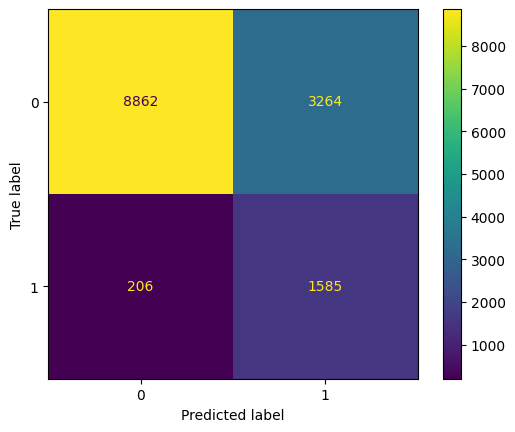

Start Epoch (Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82947, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82956],
      dtype='int64', length=63593), Index([ 3101,  3102,  3103,  3104,  3105,  3106,  3107,  3108,  3109,  3110,
       ...
       81921, 81922, 81923, 81924, 81925, 81926, 81927, 81928, 81929, 81930],
      dtype='int64', length=19364))
Epoch 1/10
111/111 [==============================] - 7s 31ms/step - loss: 0.5952 - accuracy: 0.7498 - precision: 0.7337 - recall: 0.7843 - auc_roc: 0.8068 - auc_pr: 0.7747 - true_positives: 44385.0000 - false_positives: 16112.0000 - true_negatives: 40477.0000 - false_negatives: 12204.0000 - f1_score: 0.6666 - val_loss: 0.5050 - val_accuracy: 0.7348 - val_precision: 0.2329 - val_recall: 0.8160 - val_auc_roc: 0.8441 - val_auc_pr: 0.3391 - val_true_positives: 1459.0000 - val_false_positives: 4806.0000 - val_true_negatives: 12770.0000 - val_false_negatives: 329.0000 - val_f1_scor

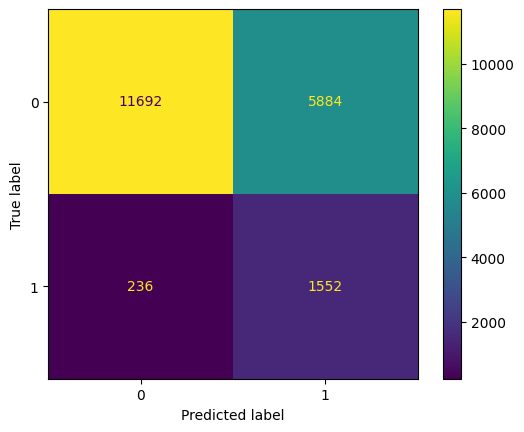

Start Epoch (Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       82947, 82948, 82949, 82950, 82951, 82952, 82953, 82954, 82955, 82956],
      dtype='int64', length=67836), Index([  128,   129,   130,   131,   132,   133,   134,   135,   136,   137,
       ...
       82229, 82230, 82231, 82232, 82233, 82234, 82235, 82236, 82237, 82238],
      dtype='int64', length=15121))
Epoch 1/10
119/119 [==============================] - 6s 29ms/step - loss: 0.6639 - accuracy: 0.7455 - precision: 0.7294 - recall: 0.7805 - auc_roc: 0.8008 - auc_pr: 0.7694 - true_positives: 47212.0000 - false_positives: 17515.0000 - true_negatives: 42975.0000 - false_negatives: 13278.0000 - f1_score: 0.6662 - val_loss: 0.5316 - val_accuracy: 0.7238 - val_precision: 0.2375 - val_recall: 0.8541 - val_auc_roc: 0.8636 - val_auc_pr: 0.4288 - val_true_positives: 1235.0000 - val_false_positives: 3966.0000 - val_true_negatives: 9709.0000 - val_false_negatives: 211.0000 - val_f1_score

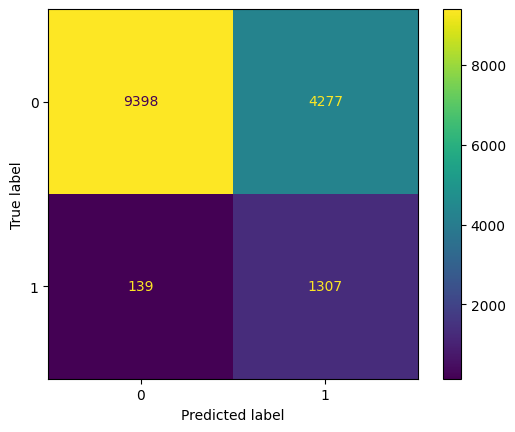

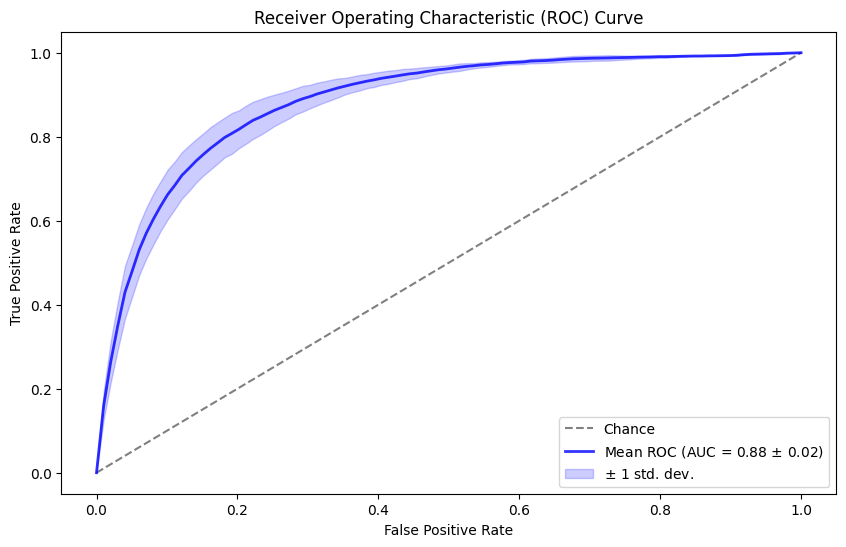

In [ ]:
# Placeholder for metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
aucs = []
auc_pr_scores = []
confusion_m = []
auc_prs = []

# For plotting ROC curve
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []


# 14-Jun-24: Modification to use Cross Val
# Split into train and validation sets
for fold in cv_strat_data:
    print(f"Start Epoch {fold}")
    train_set = mel_spec_df.loc[fold[0]]
    val_set = mel_spec_df.loc[fold[1]]

    X_train = np.array([spec.reshape(64, 16, 1) for spec in train_set['mel']])
    X_val = np.array([spec.reshape(64, 16, 1) for spec in val_set['mel']])
    y_train, y_val = train_set['label'].values, val_set['label'].values

    #print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

    # Apply SMOTE for oversampling the minority class in training data
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    smote = SMOTE()
    X_train_resampled_2d, y_train_resampled = smote.fit_resample(X_train_2d, y_train)

    # Reshape the oversampled training data back to 3D
    X_train_resampled = X_train_resampled_2d.reshape(-1, 64, 16, 1)

    # Apply SMOTE for oversampling the minority class in validation data
    X_val_2d = X_val.reshape(X_val.shape[0], -1)
    X_val_resampled_2d, y_val_resampled = smote.fit_resample(X_val_2d, y_val)

    # Reshape the oversampled validation data back to 3D
    X_val_resampled = X_val_resampled_2d.reshape(-1, 64, 16, 1)

    # Convert labels to float32
    #X_train_resampled = X_train_resampled.astype('float32')
    #X_val = X_val.astype('float32')
    y_train_resampled = y_train_resampled.astype('float32')
    y_val = y_val.astype('float32')

    # Define input shape
    model = cough_detection_model(input_shape=(64, 16, 1))
    #model.summary()

    # Fit the model
    model.fit(X_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_val)
    y_pred_classes = (y_pred > (per_proba/1000)).astype(int)

    ac = accuracy_score(y_val, y_pred_classes)
    accuracy_scores.append(ac)

    pc = precision_score(y_val, y_pred_classes)
    precision_scores.append(pc)

    rc = recall_score(y_val, y_pred_classes)
    recall_scores.append(rc)

    ff = f1_score(y_val, y_pred_classes)
    f1_scores.append(ff)

    #auc_roc_scores.append(model.evaluate(X_val, y_val, verbose=0)[4])
    #auc_pr_scores.append(model.evaluate(X_val, y_val, verbose=0)[5])

    auc_roc = roc_auc_score(y_val, y_pred)
    auc_roc_scores.append(auc_roc)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

    # Print confusion matrix for current fold
    cm = confusion_matrix(y_val, y_pred_classes, labels=[0,1])
    confusion_m.append(cm)
    print("Test Values")
    print("Accuracy", ac, "Precision", pc, "Recall", rc, "F1 Score", ff)

    print("Confusion Matrix for current fold:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=[0,1])
    disp.plot()
    plt.show()


# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='blue', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

2 fold cross validation, 10 Epoch, avg. time per epoch 2mins (53.2ms/step) training time 20mins, testing time

In [ ]:
# Save the trained model
# Define the desired path
desired_path = f'/content/drive/My Drive/{GDRIVE_MODEL_DIR}'

# Construct the full file path
model_path = f"/content/drive/My Drive/{GDRIVE_MODEL_DIR}cnn_model_melspectrogram_d{drop_out}_pb{per_proba}_batch{batch_size}_epoch{epochs}.h5"

# Create the directory if it doesn't exist
os.makedirs(desired_path, exist_ok=True)

# Save model
model.save(model_path)
print(f"Model saved to '{model_path}'")

Model saved to '/content/drive/My Drive/23-24_CE903-SU_team06/saved_models/cnn_model_melspectrogram_d50_pb50_batch1024_epoch10.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
dfc = {
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores,
    'AUC ROC': auc_roc_scores,
    #'AUC PR': auc_pr_scores,
    'Confusion Matrix':[i.tolist() for i in confusion_m]
}
dfr = pd.DataFrame(dfc)
dfr.to_feather(f'{desired_path}cnn_model_melspectrogram_d{drop_out}_pb{per_proba}_batch{batch_size}_epoch{epochs}.feather')

In [ ]:
dfr

,Accuracy,Precision,Recall,F1,AUC ROC,Confusion Matrix
0,0.842328,0.365825,0.790816,0.500242,0.898633,"[[14995, 2687], [410, 1550]]"
1,0.821632,0.386115,0.800221,0.520893,0.890310,"[[10807, 2299], [361, 1446]]"
2,0.750665,0.326872,0.884980,0.477410,0.891303,"[[8862, 3264], [206, 1585]]"
3,0.683950,0.208714,0.868009,0.336513,0.848507,"[[11692, 5884], [236, 1552]]"
4,0.707956,0.234062,0.903873,0.371835,0.893445,"[[9398, 4277], [139, 1307]]"


In [ ]:
import pandas as pd
GDRIVE_MODEL_DIR = "23-24_CE903-SU_team06/saved_models/"
desired_path = f'/content/drive/My Drive/{GDRIVE_MODEL_DIR}cnn_model_melspectrogram_d{drop_out}_pb{per_proba}_batch{batch_size}_epoch{epochs}.feather'
df_from_save = pd.read_feather(f'{desired_path}')
df_from_save

,Accuracy,Precision,Recall,F1,AUC ROC,Confusion Matrix
0,0.842328,0.365825,0.790816,0.500242,0.898633,"[[14995, 2687], [410, 1550]]"
1,0.821632,0.386115,0.800221,0.520893,0.890310,"[[10807, 2299], [361, 1446]]"
2,0.750665,0.326872,0.884980,0.477410,0.891303,"[[8862, 3264], [206, 1585]]"
3,0.683950,0.208714,0.868009,0.336513,0.848507,"[[11692, 5884], [236, 1552]]"
4,0.707956,0.234062,0.903873,0.371835,0.893445,"[[9398, 4277], [139, 1307]]"


In [29]:
GDRIVE_DATA_DIR = "23-24_CE903-SU_team06/dataset/"
GDRIVE_MODEL_DIR = "23-24_CE903-SU_team06/saved_models/"

desired_path = f'/content/drive/My Drive/{GDRIVE_MODEL_DIR}'

import os
feather_files = [f for f in os.listdir(desired_path) if f.endswith('.feather')]
feather_files

def calculate_metrics_from_confusion_matrix(matrix):
    """
    Calculate recall (sensitivity), specificity, and precision from a 2x2 confusion matrix.

    Args:
    matrix (list of lists): 2x2 confusion matrix. Example: [[TN, FP], [FN, TP]]

    Returns:
    dict: Dictionary containing recall, specificity, and precision.
    """
    TN, FP = matrix[0]
    FN, TP = matrix[1]

    # Calculate recall (sensitivity)
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return {
        'accuracy':accuracy,
        'recall': recall,
        'specificity': specificity,
        'precision': precision
    }


In [34]:
dxf = {"Model":[], "Acc":[], "Recall":[], "Precision":[], "Specificity":[], "F1":[], "AUC ROC":[]}
for x in feather_files:
  #print(x)
  dx = pd.read_feather(f'{desired_path}{x}')
  #print(dx)
  #print( calculate_metrics_from_confusion_matrix( np.sum(dx["cm"].values) ) )
  #break

  if 'cm' in dx.columns:
    clm = 'cm'
  elif 'Confusion Matrix' in dx.columns:
    clm = 'Confusion Matrix'

  #print( dx.columns, dx[clm].values )

  vc = calculate_metrics_from_confusion_matrix( np.sum(dx[clm].values) )

  if 'precision' in dx.columns:
    clp = 'precision'
  elif 'Precision' in dx.columns:
    clp = 'Precision'
  if 'f1' in dx.columns:
    clf1 = 'f1'
  elif 'F1' in dx.columns:
    clf1 = 'F1'

  if 'auc_roc' in dx.columns:
    cl = 'auc_roc'
  elif 'AUC ROC' in dx.columns:
    cl = 'AUC ROC'
  else:
    continue
  if 'accuracy' in dx.columns:
    cla = 'accuracy'
  elif 'Accuracy' in dx.columns:
    cla = 'Accuracy'
  else:
    continue
  if 'Recall' in dx.columns:
    clr = 'Recall'
  elif 'recall' in dx.columns:
    clr = 'recall'
  else:
    continue

  dxf["Model"].append( x.replace('_training_results', '').replace('_default_params', '').replace('.feather', '').replace('_model', '') )
  dxf["Acc"].append( dx[cla].mean() )
  dxf["Recall"].append( dx[clr].mean() )
  dxf["Precision"].append( dx[clp].mean() )
  dxf["Specificity"].append( vc['specificity'] )
  dxf["F1"].append( dx[clf1].mean() )
  dxf["AUC ROC"].append( dx[cl].mean() )
  #print( dx[cl].mean() )

dgx = pd.DataFrame(dxf)
sorted_df = dgx.sort_values(by=['AUC ROC', 'F1', 'Acc'], ascending=[False, False, False])
sorted_df

,Model,Acc,Recall,Precision,Specificity,F1,AUC ROC
17,logistic_time_freq_domain,0.921754,0.527573,0.731453,0.971950,0.607008,0.928552
18,logistic_tuned_time_freq_domain,0.921754,0.527573,0.731453,0.971950,0.607008,0.928552
6,logistic_grid2_time_freq_domain,0.921754,0.527573,0.731453,0.971950,0.607008,0.928549
5,logistic_grid_time_freq_domain,0.921740,0.527011,0.731330,0.972020,0.606665,0.928502
26,cnn_melspectrogram_drop5_5_batch784_epoch10,0.881995,0.616946,0.491043,0.911535,0.528967,0.898507
32,cnn_melspectrogram_d50_pb50_batch1024_epoch10,0.761306,0.849580,0.304317,0.751756,0.441379,0.884440
2,cnn_spectrogram_batch512_epoch10,0.862985,0.589152,0.409014,0.897976,0.476147,0.869372
21,cnn_spectrogram_drop25_5_batch784_epoch10,0.882451,0.454150,0.469569,0.931234,0.452112,0.855138
20,cnn_spectrogram_drop25_7_batch784_epoch10,0.890648,0.383976,0.508760,0.950974,0.421791,0.854193
28,cnn_melspectrogram_d0_pb125_batch512_epoch10,0.862501,0.634801,0.424628,0.886469,0.500886,0.852462
